In [11]:
import numpy as np




def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))



class BaseModel:
    def __init__(self, learning_rate=0.1, n_iterations=1000000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tolerance = tolerance
        self.weights = None
        self.loss = []

    def fit(self, X, y):
        raise NotImplementedError("Method fit must be implemented")

    def predict(self, X):
        raise NotImplementedError("Method predict must be implemented")
    

Weights (including bias): [ 797.58382561 -797.16979063   25.09157161]
R-squared (R^2): 0.7760349878213245
Mean Squared Error (MSE): 32.25096175372927
Root Mean Squared Error (RMSE): 5.678993022863232
Mean Absolute Error (MAE): 4.705517071745117


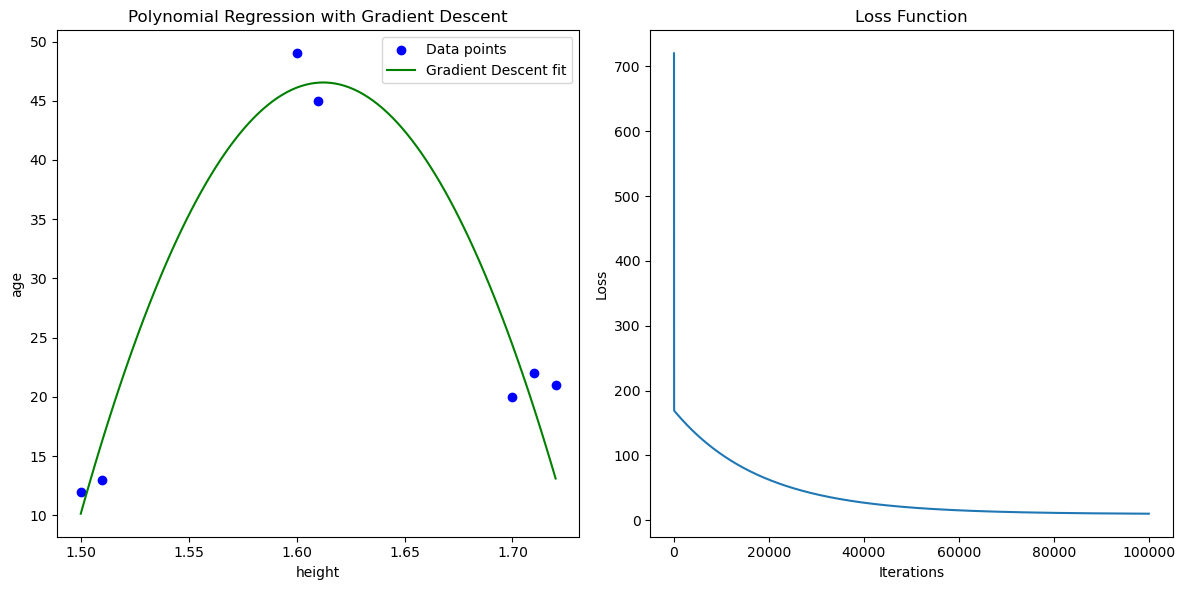

In [352]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

class PolynomialRegressionGD(BaseModel):
    def __init__(self, learning_rate=0.1, n_iterations=1000000, tolerance=1e-6):
        super().__init__(learning_rate, n_iterations, tolerance)
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.loss = []
        self.tolerance = tolerance

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features, 1) * 0.01

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights)
            r = (y_predicted - y)
            transpose_x = X.transpose()
            gradients = transpose_x @ r
            gradients_mean = gradients / n_samples
            self.weights -= self.learning_rate * gradients_mean

            mse_loss = np.mean((y - y_predicted) ** 2)
            self.loss.append(mse_loss)

            if len(self.loss) > 1 and np.abs(self.loss[-1] - self.loss[-2]) < self.tolerance:
                break

    def predict(self, X):
        return np.dot(X, self.weights)


X1 = np.array([1.5, 1.51, 1.7, 1.71, 1.72, 1.61, 1.6]).reshape(-1, 1)
y = np.array([12, 13, 20, 22, 21, 45, 49]).reshape(-1, 1)

poly = PolynomialFeatures(degree=2, include_bias=False)
X2 = poly.fit_transform(X1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)
X_scaled_with_bias = np.column_stack((X_scaled, np.ones((len(X1), 1))))



X_train, X_test, y_train, y_test = train_test_split(X_scaled_with_bias, y, test_size=0.2, random_state=6)



model = PolynomialRegressionGD(learning_rate=0.25, n_iterations=100000)
# model.fit(X_scaled_with_bias, y)

# Aask why model is wrong(not enough data?)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Coefficients
print("Weights (including bias):", model.weights.flatten())
print("R-squared (R^2):", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


X_plot = np.linspace(min(X1), max(X1), 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
X_plot_poly_scaled = scaler.transform(X_plot_poly)
X_plot_poly_scaled_with_bias = np.column_stack((X_plot_poly_scaled, np.ones((len(X_plot), 1))))

y_plot_gd_custom = model.predict(X_plot_poly_scaled_with_bias)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X1, y, color='blue', label='Data points')
plt.plot(X_plot, y_plot_gd_custom, color='green', label='Gradient Descent fit')
plt.xlabel('height')
plt.ylabel('age')
plt.title('Polynomial Regression with Gradient Descent')
plt.legend()


plt.subplot(1, 2, 2)
iterations = min(model.n_iterations, len(model.loss))
plt.plot(range(iterations), model.loss[:iterations])
plt.title("Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.tight_layout()
plt.show()


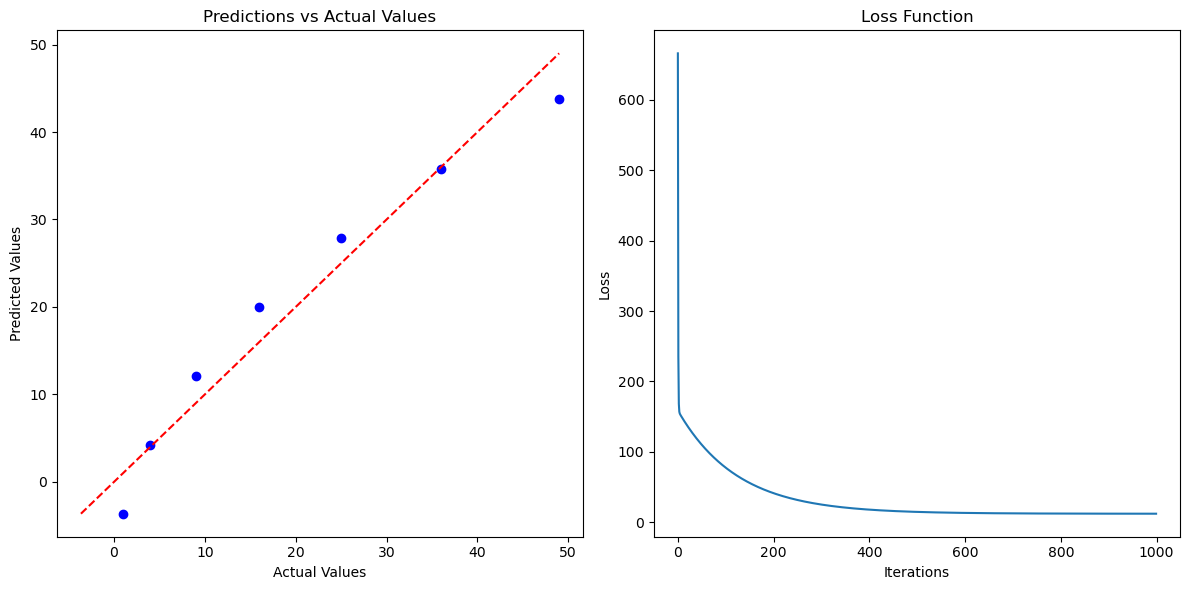

Weights (including bias): [ 7.62668588  2.64311628 -2.37511656 -1.00420455]


In [336]:
import matplotlib.pyplot as plt

class linearRegression(BaseModel):
    def __init__(self, learning_rate=0.1, n_iterations=1000000, tolerance=1e-6):
        super().__init__(learning_rate, n_iterations, tolerance)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features, 1) * 0.01

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights)
            loss = (1 / n_samples) * np.sum((y - y_predicted) ** 2)
            self.loss.append(loss)
            # Update coefficients
            gradients = -2 * np.dot(X.T, y - y_predicted) / n_samples
            self.weights -= self.learning_rate * gradients

            if len(self.loss) > 1 and np.abs(self.loss[-1] - self.loss[-2]) < self.tolerance:
                break
        
    def predict(self, X):
        return X @ self.weights



X1 = np.array([1, 2, 3, 4, 5, 6, 7])
X2 = np.array([6, 7, 8, 9, 10, 11, 12])
X3 = np.array([11, 12, 13, 14, 15, 16, 17])
X = np.column_stack((X1, X2, X3, np.ones((len(X1), 1))))
y = np.array([1, 4, 9, 16, 25, 36, 49])
y = y.reshape(-1, 1)


# Model training
model = linearRegression(learning_rate=0.001, n_iterations=1000)
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plotting
plt.figure(figsize=(12, 6))

# Since X is multi-dimensional, we can't plot it directly against y.
# Instead, we'll plot the predicted values against the actual values.
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred, color='blue')  # Plotting the actual vs predicted values
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs Actual Values")

# Add a line of perfect predictions
max_value = max(y.max(), y_pred.max())  # Get the maximum value for the plot range
min_value = min(y.min(), y_pred.min())  # Get the minimum value for the plot range
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--')

# Plotting the loss function
plt.subplot(1, 2, 2)
plt.plot(range(model.n_iterations), model.loss)
plt.title("Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

# Coefficients
print("Weights (including bias):", model.weights.flatten())


Weights (including bias): [1.02102009 5.33002396 0.96241728]
Confusion Matrix:
 [[2 0]
 [0 1]]
True Positives: 1
True Negatives: 2
False Positives: 0
False Negatives: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


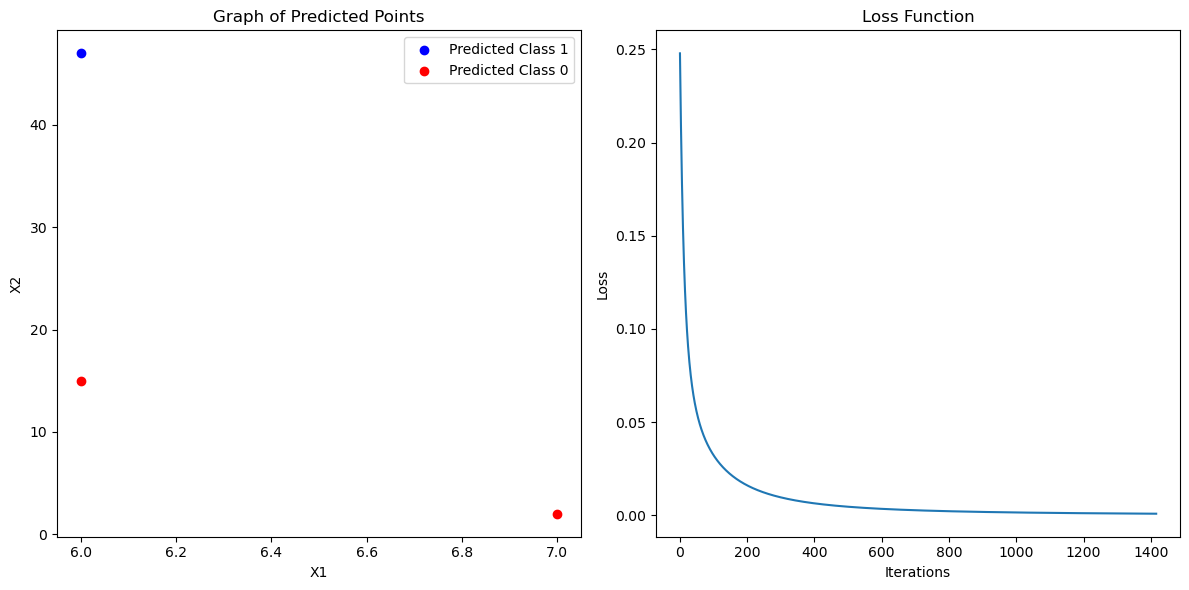

In [338]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


class classificationRegressor(BaseModel):
    def __init__(self, learning_rate=0.1, n_iterations=1000000, tolerance=1e-6):
        super().__init__(learning_rate, n_iterations, tolerance)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features, 1) * 0.01

        for _ in range(self.n_iterations):
            y_predicted = sigmoid(X @ self.weights)
            gradients = X.T @ (y_predicted - y) / n_samples
            self.weights -= self.learning_rate * gradients
            mse_loss = np.mean((y - y_predicted) ** 2)
            self.loss.append(mse_loss)

            if len(self.loss) > 1 and np.abs(self.loss[-1] - self.loss[-2]) < self.tolerance:
                break
    
    def predict(self, X):
        probabilities = sigmoid(X @ self.weights)
        return np.where(probabilities >= 0.5, 1, 0)



X1 = np.array([4, 7, 5, 8, 5, 6, 7, 6, 6, 7, 6, 6])
X2 = np.array([6, 2, 34, 33, 11, 12, 43, 4, 15, 29, 55, 47])
y = np.array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1]).reshape(-1, 1)

X = np.column_stack((X1, X2))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_with_bias = np.column_stack((X_scaled, np.ones(len(X1))))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_with_bias, y, test_size=0.2, random_state=6)

model = classificationRegressor(learning_rate=0.1, n_iterations=10000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Weights (including bias):", model.weights.flatten())
print("Confusion Matrix:\n", conf_matrix)
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.figure(figsize=(12, 6))

X_test_unscaled = scaler.inverse_transform(X_test[:, :2])

X1_test_unscaled = X_test_unscaled[:, 0]
X2_test_unscaled = X_test_unscaled[:, 1]

X1_class_1_unscaled = X1_test_unscaled[y_pred.flatten() == 1]
X2_class_1_unscaled = X2_test_unscaled[y_pred.flatten() == 1]
X1_class_0_unscaled = X1_test_unscaled[y_pred.flatten() == 0]
X2_class_0_unscaled = X2_test_unscaled[y_pred.flatten() == 0]

plt.subplot(1, 2, 1)
plt.scatter(X1_class_1_unscaled, X2_class_1_unscaled, color='blue', label='Predicted Class 1')
plt.scatter(X1_class_0_unscaled, X2_class_0_unscaled, color='red', label='Predicted Class 0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Graph of Predicted Points')
plt.legend()

# Plotting the loss function
plt.subplot(1, 2, 2)
plt.plot(range(len(model.loss)), model.loss)
plt.title("Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()
    

In [339]:
class PerceptronModel(BaseModel):
    def __init__(self, learning_rate=0.001, n_iterations=1000, tolerance=1e-6, activation_function=None):
        super().__init__(learning_rate, n_iterations, tolerance)
        self.bias = None

        if activation_function is None:
            self.activation_function = lambda x: np.where(x > 0, 1, 0)
        else:
            self.activation_function = activation_function

    @staticmethod
    def create_mini_batches(X , y, batch_size):
        mini_batches = []
        data = np.hstack((X, y.reshape((-1, 1))))
        np.random.shuffle(data)
        n_minibatches = data.shape[0] // batch_size

        for i in range(n_minibatches):
            mini_batch = data[i * batch_size:(i + 1) * batch_size, :]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1].reshape((-1, 1))
            mini_batches.append((X_mini, Y_mini))
        if data.shape[0] % batch_size != 0:
            mini_batch = data[i * batch_size:data.shape[0]]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1].reshape((-1, 1))
            mini_batches.append((X_mini, Y_mini))
        return mini_batches

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features, 1) * 0.01
        self.bias = 0
        mini_batches = self.create_mini_batches(X, y, 2)
    
        for _ in range(self.n_iterations):
            for batch in mini_batches:
                linear_output = batch[0] @ self.weights 
                y_predicted = self.activation_function(linear_output)
                transpose = batch[0].transpose()
                r = y_predicted - batch[1]
                update_w = self.learning_rate * (transpose @ r) / batch[0].shape[0]
                update_b = self.learning_rate * np.mean(y_predicted - batch[1])
                self.weights -= update_w
                self.bias -= update_b


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return np.where(y_predicted > 0.5, 1, 0)



X1 = np.array([4, 7, 5, 8, 5])
X2 = np.array([6, 2, 1, 2, 6])
X3 = np.array([18, 6, 3, 6, 18])
X = np.column_stack((X1, X2, X3))
y = np.array([0, 0, 1, 1, 0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

model = PerceptronModel(learning_rate=0.001, n_iterations=10000, activation_function = sigmoid)

model.fit(X_train, y_train)

y_pred = model.predict(X)

conf_matrix = confusion_matrix(y, y_pred)

TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("Weights (including bias):", model.weights.flatten())
print("Confusion Matrix:\n", conf_matrix)
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
    

Weights (including bias): [ 1.2722263  -0.51829814 -1.58924872]
Confusion Matrix:
 [[3 0]
 [0 2]]
True Positives: 2
True Negatives: 3
False Positives: 0
False Negatives: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Iteration 0, Loss: 22672392321930.145
Iteration 1000, Loss: 856812243682.1436
Iteration 2000, Loss: 854185184713.6798
Iteration 3000, Loss: 854332991094.8722
Iteration 4000, Loss: 854370595266.148
Iteration 5000, Loss: 854378487524.2793
Iteration 6000, Loss: 854380238071.1405
Iteration 7000, Loss: 854380768175.9186


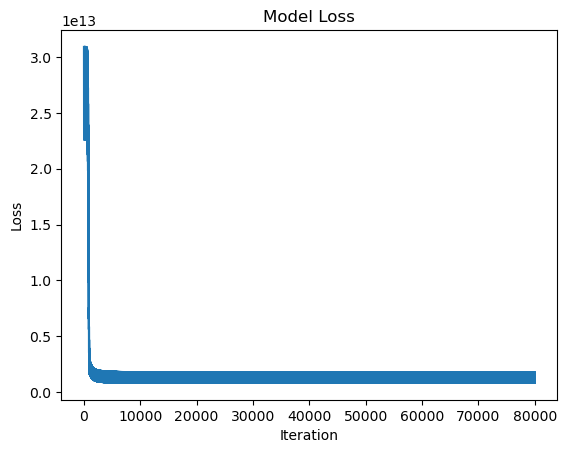

[[3037510.79842531]
 [6409938.20926792]
 [3691697.82828154]
 [3027710.24367091]
 [6976476.4789358 ]
 [2630546.45217333]
 [7089762.89391569]
 [4673426.33150228]
 [3140416.62334652]
 [3525702.11608928]
 [6552982.76639741]
 [5179152.35248288]
 [3661120.81215854]
 [7439159.3077972 ]
 [6466315.43164849]
 [4253813.73455244]
 [7943940.2978826 ]
 [6409359.90857644]
 [2604897.75734174]
 [2869514.7252314 ]
 [5493950.73322363]
 [2625478.92232598]
 [3603995.20016071]
 [3055054.85182122]
 [2964379.03245549]
 [5018920.9892284 ]
 [5023952.32134787]
 [4430694.54330544]
 [6291042.84218324]
 [3056927.71852958]
 [6554084.86286383]
 [3852986.24554852]
 [5949041.41307701]
 [9775921.54393185]
 [5237409.54744298]
 [5660076.98484974]
 [7846539.70289137]
 [3712549.55404034]
 [5315215.19052584]
 [7481253.89816991]
 [7284598.6371439 ]
 [2712703.85964014]
 [4665037.52175049]
 [3090151.39967677]
 [4304289.19901622]
 [4849173.7507001 ]
 [2835336.97606236]
 [5260701.1694936 ]
 [3652565.18385103]
 [3882605.38629847]


In [354]:

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin


class DeepModel(BaseModel):
    def __init__(self, learning_rate=0.001, n_iterations=100000, tolerance=1e-6, layers=None):
        super().__init__(learning_rate, n_iterations, tolerance)
        self.functions = []
        self.weights = []
        self.bias = []
        self.loss = []
        self.n_layers = layers
        if layers is None:
            layers = []
        for i in range(len(self.n_layers) - 1):
            self.weights.append(np.random.randn(layers[i][0], layers[i + 1][0]))
            self.bias.append(np.random.randn(1, layers[i + 1][0]))
            self.functions.append(layers[i][1])




    @staticmethod
    def create_mini_batches(X , y, batch_size):
        mini_batches = []

        # dense_matrix = X.toarray()
        # 
        data = np.hstack((X, y.values.reshape(-1, 1)))

        np.random.shuffle(data)
        n_minibatches = data.shape[0] // batch_size

        for i in range(n_minibatches):
            mini_batch = data[i * batch_size:(i + 1) * batch_size, :]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1].reshape((-1, 1))
            mini_batches.append((X_mini, Y_mini))
        if data.shape[0] % batch_size != 0:
            mini_batch = data[i * batch_size:data.shape[0]]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1].reshape((-1, 1))
            mini_batches.append((X_mini, Y_mini))
        return mini_batches

    def forward_pass(self, X):
        activations = [None] * len(self.n_layers)
        activations[0] = X
        outputs = [None] * len(self.n_layers)

        for l in range(len(self.n_layers)-1):
            Z = activations[l] @ self.weights[l] + self.bias[l]
            outputs[l + 1] = Z
            activations[l + 1] = self.functions[l][0](Z)

        return activations, outputs

    def fit(self, X, y):
        mini_batches = self.create_mini_batches(X, y, 50)


        # gradient matrices 

        d_weights = [None] * (len(self.n_layers) - 1)
        d_bias = [None] * (len(self.n_layers) - 1)
        dz = [None] * (len(self.n_layers) - 1)

        for i in range(len(self.n_layers) - 1):
            d_weights[i] = np.zeros((self.n_layers[i][0], self.n_layers[i+1][0]))
            d_bias[i] = np.zeros((1, self.n_layers[i + 1][0]))
            
        

        for i in range(self.n_iterations):
            for batch in mini_batches:
                # forward pass

                activations, outputs = self.forward_pass(batch[0])

                # backward pass

                for rl in reversed(range(len(self.n_layers) - 1)):
                    if rl == len(self.n_layers) - 2:
                        dz[rl] = 2 * (activations[rl + 1] - batch[1]) * self.functions[rl][1](outputs[rl + 1])
                    else:
                        dz[rl] = (dz[rl + 1] @ self.weights[rl + 1].transpose()) * self.functions[rl][1](outputs[rl + 1])

                    d_weights[rl] = (activations[rl].T @ dz[rl])

                    d_bias[rl] = np.sum(dz[rl], axis=0, keepdims=True)

                for l in range(len(self.n_layers) - 1):
                    self.weights[l] -= d_weights[l] * self.learning_rate
                    self.bias[l] -= d_bias[l] * self.learning_rate
                mse_loss = np.mean((activations[-1] - batch[1]) ** 2)
                self.loss.append(mse_loss)
    
            if i % 1000 == 0:
                print(f'Iteration {i}, Loss: {self.loss[-1]}')
                # if abs(self.loss[-1] - self.loss[-2]) < 1000000000000:
                #     self.learning_rate *= 1.5
                #     print(f"Learning rate adjusted to: {self.learning_rate}")
                    


    def plot_loss(self):
        plt.plot(self.loss)
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Iteration')
        plt.show()
                
    def predict(self, X):
        activations, outputs = self.forward_pass(X)
        return activations[-1]

import pandas as pd


data = pd.read_csv('/Users/keru/Downloads/Housing.csv')
X = data.drop('price', axis=1)
y = data['price']

# Define custom transformers
class YesNoTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.applymap(lambda x: 1 if x == 'yes' else 0)

class FurnishingTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        mapping = {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}
        return X.applymap(lambda x: mapping[x])

# Define categorical and numerical features
yes_no_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
furnishing_feature = ['furnishingstatus']
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('yes_no', YesNoTransformer(), yes_no_features),
        ('furnishing', FurnishingTransformer(), furnishing_feature)
    ]
)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Process the features
X_processed = pipeline.fit_transform(X)

# Split the data
X_train, X1_test, y_train, y1_test = train_test_split(X_processed, y, test_size=0.1, random_state=39)


def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

def leaky_relu_derivative(x, alpha=0.01):
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx

def identity(x):
    return x

def identity_derivative(x):
    return 1

layers_info = [
    (12, [leaky_relu, leaky_relu_derivative]),
    (9, [leaky_relu, leaky_relu_derivative]),
    (1, [identity, identity_derivative])
]

price = DeepModel(layers = layers_info, n_iterations= 8000, learning_rate=0.00000000001)

price.fit(X_train, y_train)

price.plot_loss()

y_pred = price.predict(X1_test)

print(y_pred)

# Quality Metrics
mse = mean_squared_error(y1_test.values, y_pred)
rmse = np.sqrt(mse)
avg = rmse/ 109
r2 = r2_score(y1_test.values, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"AVG Root Mean Squared Error (RMSE): {avg}")
print(f"R² Score: {r2}")



Weights (including bias): [ 0.79747164 -0.33439613 -1.02607297]
Confusion Matrix:
 [[3 0]
 [0 2]]
True Positives: 2
True Negatives: 3
False Positives: 0
False Negatives: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
